# Install and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import plotly.express as px

In [2]:
def read_output_files(folder_path):
    dfs = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'rb') as file:
                df = pickle.load(file)
                dfs.append(df)
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    else:
        print("No pickle files found in the folder.")
        return None
out_path = 'Output'

# Regression

In [3]:
ds_model_rg = read_output_files(out_path)
ds_model_rg_srt = ds_model_rg.sort_values(by='PercentRemoved')
ds_model_rg_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.751002,0.00
1,2,0.749084,0.07
2,2,0.752887,0.07
3,2,0.751919,0.07
4,2,0.751504,0.07
...,...,...,...
12995,2,0.726017,91.00
12996,2,0.740599,91.00
12997,2,0.759018,91.00
12998,2,0.759785,91.00


In [4]:
hg_acc_cb = ds_model_rg_srt['Accuracy'].max()
lw_acc_cb = ds_model_rg_srt['Accuracy'].min()
base_acc_cb = ds_model_rg_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_rg = pd.DataFrame(cbkeyval)
dataf_rg

Difference between highest and lowest accuracy: 0.05687199183236913
Difference between highest and base accuracy: 0.022287829025119943
Difference between lowest and base accuracy: -0.034584162807249186


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.77329,0.716418,0.751002,0.056872,0.022288,-0.034584


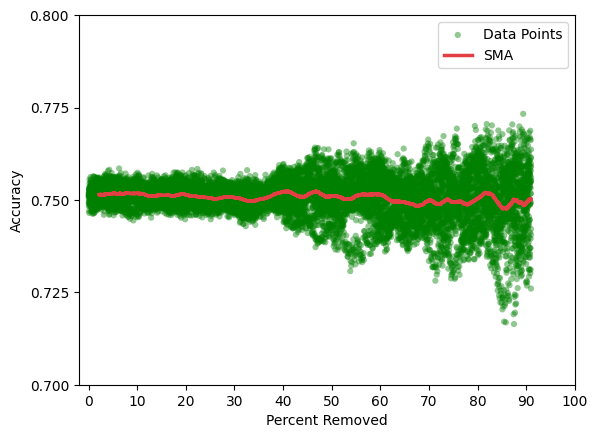

In [23]:
span = 300
ds_model_rg_srt['SMA'] = ds_model_rg_srt['Accuracy'].rolling(window=span).mean()

# Plotting
fig, ax = plt.subplots()
ax.scatter(ds_model_rg_srt['PercentRemoved'], ds_model_rg_srt['Accuracy'], alpha=0.43, color='green', s=20, edgecolors='none', label='Data Points')
ax.plot(ds_model_rg_srt['PercentRemoved'], ds_model_rg_srt['SMA'], color='#E23F44', linewidth=2.5, label='SMA')
ax.set_xlim(-2, 100)
ax.set_xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
ax.set_xlabel('Percent Removed')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()


# Decision Tree

In [24]:
ds_model_dt = read_output_files(out_path)
ds_model_dt_srt = ds_model_dt.sort_values(by='PercentRemoved')
ds_model_dt_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.734001,0.00
1,2,0.737326,0.07
2,2,0.741960,0.07
3,2,0.742306,0.07
4,2,0.738433,0.07
...,...,...,...
12995,2,0.722180,91.00
12996,2,0.743668,91.00
12997,2,0.740599,91.00
12998,2,0.733691,91.00


In [25]:
hg_acc_cb = ds_model_dt_srt['Accuracy'].max()
lw_acc_cb = ds_model_dt_srt['Accuracy'].min()
base_acc_cb = ds_model_dt_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_dt = pd.DataFrame(cbkeyval)
dataf_dt

Difference between highest and lowest accuracy: 0.06043905068381705
Difference between highest and base accuracy: 0.037267794956910794
Difference between lowest and base accuracy: -0.02317125572690626


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.771269,0.71083,0.734001,0.060439,0.037268,-0.023171


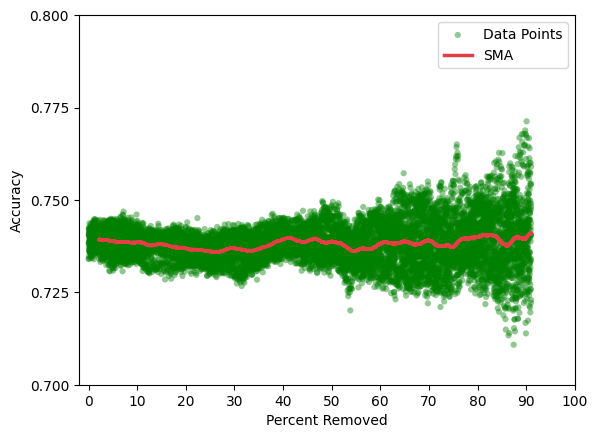

In [26]:
span = 300
ds_model_dt_srt['SMA'] = ds_model_dt_srt['Accuracy'].rolling(window=span).mean()

# Plotting
fig, ax = plt.subplots()
ax.scatter(ds_model_dt_srt['PercentRemoved'], ds_model_dt_srt['Accuracy'], alpha=0.43, color='green', s=20, edgecolors='none', label='Data Points')
ax.plot(ds_model_dt_srt['PercentRemoved'], ds_model_dt_srt['SMA'], color='#E23F44', linewidth=2.5, label='SMA')
ax.set_xlim(-2, 100)
ax.set_xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
ax.set_xlabel('Percent Removed')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

# Bagging

In [29]:
ds_model_bg = read_output_files(out_path)
ds_model_bg_srt = ds_model_bg.sort_values(by='PercentRemoved')
ds_model_bg_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.734485,0.00
1,2,0.739747,0.07
2,2,0.740369,0.07
3,2,0.737465,0.07
4,2,0.735666,0.07
...,...,...,...
12995,2,0.713738,91.00
12996,2,0.729854,91.00
12997,2,0.725249,91.00
12998,2,0.736761,91.00


In [30]:
hg_acc_cb = ds_model_bg_srt['Accuracy'].max()
lw_acc_cb = ds_model_bg_srt['Accuracy'].min()
base_acc_cb = ds_model_bg_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_bg = pd.DataFrame(cbkeyval)
dataf_bg

Difference between highest and lowest accuracy: 0.05139352862432012
Difference between highest and base accuracy: 0.0277446649259816
Difference between lowest and base accuracy: -0.023648863698338518


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.76223,0.710836,0.734485,0.051394,0.027745,-0.023649


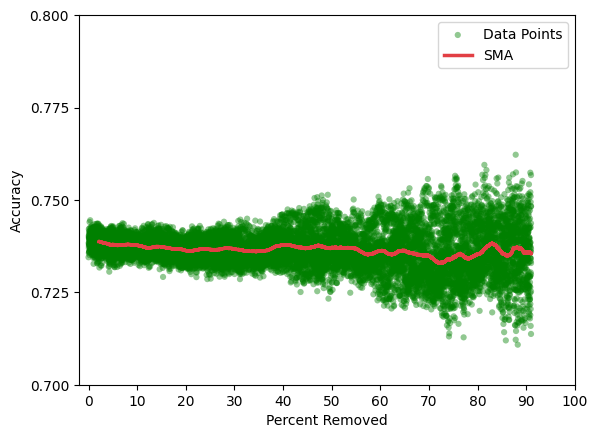

In [31]:
span = 300
ds_model_bg_srt['SMA'] = ds_model_bg_srt['Accuracy'].rolling(window=span).mean()

# Plotting
fig, ax = plt.subplots()
ax.scatter(ds_model_bg_srt['PercentRemoved'], ds_model_bg_srt['Accuracy'], alpha=0.43, color='green', s=20, edgecolors='none', label='Data Points')
ax.plot(ds_model_bg_srt['PercentRemoved'], ds_model_bg_srt['SMA'], color='#E23F44', linewidth=2.5, label='SMA')
ax.set_xlim(-2, 100)
ax.set_xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
ax.set_xlabel('Percent Removed')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()


# Random Forest

In [32]:
ds_model_rf = read_output_files(out_path)
ds_model_rf_srt = ds_model_rf.sort_values(by='PercentRemoved')
ds_model_rf_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.749136,0.00
1,2,0.750121,0.07
2,2,0.750605,0.07
3,2,0.751919,0.07
4,2,0.747700,0.07
...,...,...,...
12995,2,0.712970,91.00
12996,2,0.742901,91.00
12997,2,0.748273,91.00
12998,2,0.755180,91.00


In [33]:
hg_acc_cb = ds_model_rf_srt['Accuracy'].max()
lw_acc_cb = ds_model_rf_srt['Accuracy'].min()
base_acc_cb = ds_model_rf_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_rg = pd.DataFrame(cbkeyval)
dataf_rg

Difference between highest and lowest accuracy: 0.06496544451762432
Difference between highest and base accuracy: 0.022438906097668743
Difference between lowest and base accuracy: -0.04252653841995557


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.771575,0.70661,0.749136,0.064965,0.022439,-0.042527


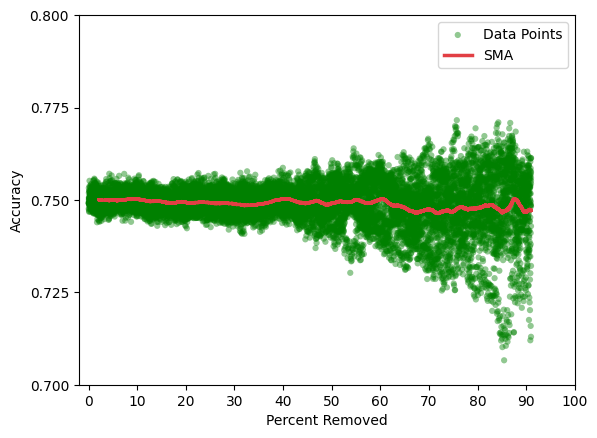

In [35]:
span = 300
ds_model_rf_srt['SMA'] = ds_model_rf_srt['Accuracy'].rolling(window=span).mean()

# Plotting
fig, ax = plt.subplots()
ax.scatter(ds_model_rf_srt['PercentRemoved'], ds_model_rf_srt['Accuracy'], alpha=0.43, color='green', s=20, edgecolors='none', label='Data Points')
ax.plot(ds_model_rf_srt['PercentRemoved'], ds_model_rf_srt['SMA'], color='#E23F44', linewidth=2.5, label='SMA')
ax.set_xlim(-2, 100)
ax.set_xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
ax.set_xlabel('Percent Removed')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

# CatBoost

In [10]:
ds_model_cb = read_output_files(out_path)
ds_model_cb_srt = ds_model_cb.sort_values(by='PercentRemoved')
ds_model_cb_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.755079,0.00
1,2,0.777647,0.07
2,2,0.779030,0.07
3,2,0.781797,0.07
4,2,0.780275,0.07
...,...,...,...
12995,2,0.745971,91.00
12996,2,0.771297,91.00
12997,2,0.780507,91.00
12998,2,0.778972,91.00


In [11]:
hg_acc_cb = ds_model_cb_srt['Accuracy'].max()
lw_acc_cb = ds_model_cb_srt['Accuracy'].min()
base_acc_cb = ds_model_cb_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_cb = pd.DataFrame(cbkeyval)
dataf_cb

Difference between highest and lowest accuracy: 0.060941145486071324
Difference between highest and base accuracy: 0.049039058624903986
Difference between lowest and base accuracy: -0.011902086861167338


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.804119,0.743177,0.755079,0.060941,0.049039,-0.011902


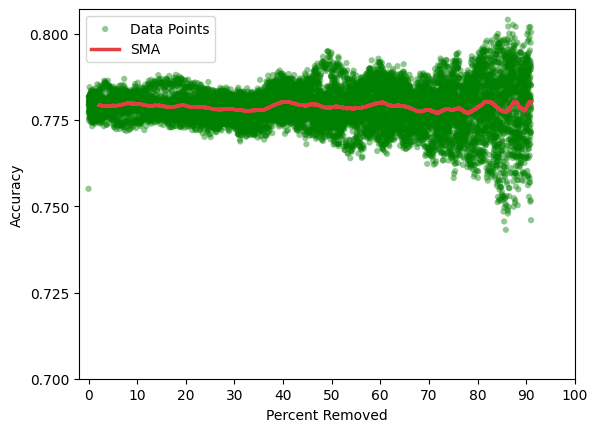

In [21]:
span = 300
ds_model_cb_srt['SMA'] = ds_model_cb_srt['Accuracy'].rolling(window=span).mean()

# Plotting
fig, ax = plt.subplots()
ax.scatter(ds_model_cb_srt['PercentRemoved'], ds_model_cb_srt['Accuracy'], alpha=0.43, color='green', s=20, edgecolors='none', label='Data Points')
ax.plot(ds_model_cb_srt['PercentRemoved'], ds_model_cb_srt['SMA'], color='#E23F44', linewidth=2.5, label='SMA')
ax.set_xlim(-2, 100)
ax.set_xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
ax.set_xlabel('Percent Removed')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()